<a href="https://colab.research.google.com/github/naghmeadibi/CHW04_ML/blob/main/Support_Vector_Machines_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A classification model using SVM for Salary Data
In this notebook, we will built a classification model using Support Vector Machines (SVM) to predict whether an individual's salary is above or below $50,000 based on various features such as age, occupation, and more. We will perform exploratory data analysis to gain insights into the data and preprocess it for modeling. Next, we will train an SVM model using the training data. We'll evaluate the model's performance on the testing data, fine-tune its hyperparameters and perform additional preprocessing to improve its accuracy. Overall, the goal of this notebook is to demonstrate how to build a classification model using SVM and how to optimize its performance.

## Section 1. Importing Necessary Libraries

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Section 2. Load Train and Test Dataset

In [ ]:
# TODO: Load the 'SalaryData_Train.csv' file into a pandas dataframe called train_data

# TODO: Load the 'SalaryData_Test.csv' file into a pandas dataframe called test_data

# TODO: Display the first 5 or 10 rows of the train_data dataframe
train_data = pd.read_csv('SalaryData_Train.csv')
test_data = pd.read_csv('SalaryData_Test.csv')
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Section 3. EDA

In [ ]:
# TODO: Print the shape of the train_data dataframe

# TODO: Print the shape of the test_data dataframe

# TODO: Print the information about the train_data dataframe

# TODO Display the summary statistics of the train_data dataframe

# TODO: Replace any NaN values in the train_data dataframe with 0

# TODO: Print the number of NaN values in each column of the train_data dataframe
# Print the shape of the train_data dataframe
print("Train Data Shape:", train_data.shape)

# Print the shape of the test_data dataframe
print("Test Data Shape:", test_data.shape)

# Print the information about the train_data dataframe
print(train_data.info())

# Display the summary statistics of the train_data dataframe
print(train_data.describe())

# Replace any NaN values in the train_data dataframe with 0
train_data.fillna(0, inplace=True)

# Print the number of NaN values in each column of the train_data dataframe
print("Number of NaN values in each column:")
print(train_data.isnull().sum())

Train Data Shape: (30161, 14)
Test Data Shape: (15060, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB
None
                age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.

## Data Visualization

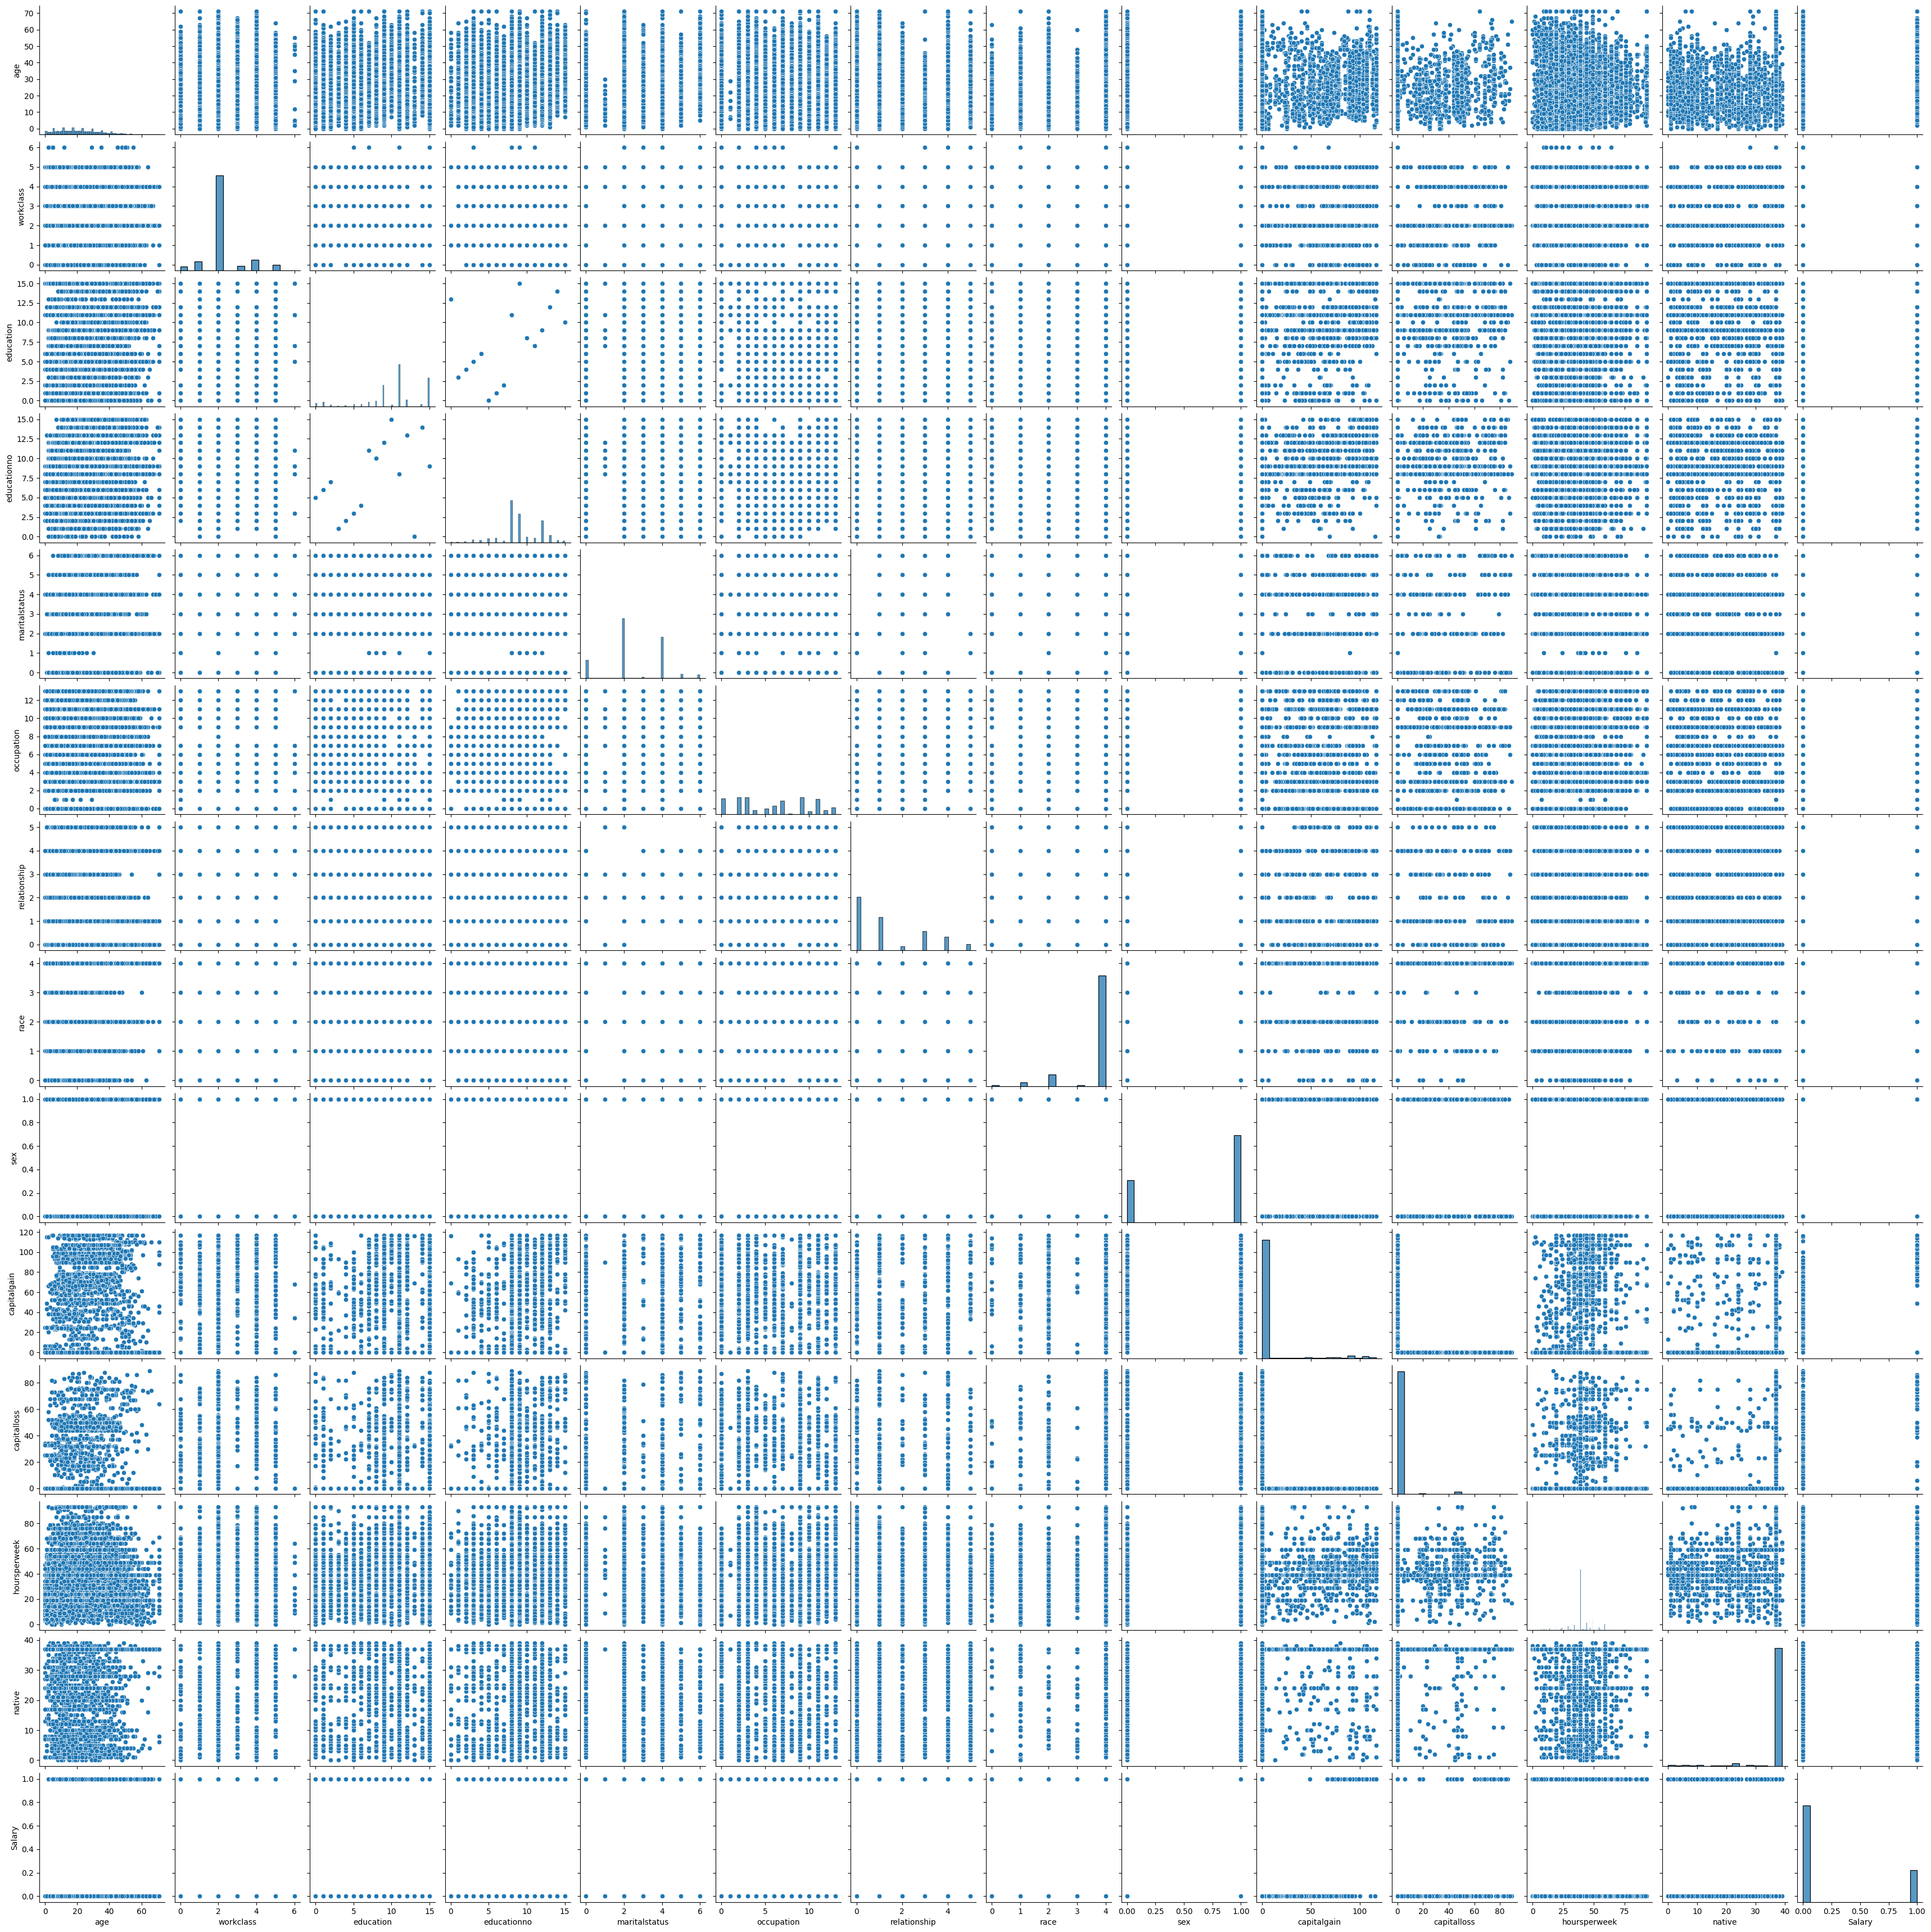

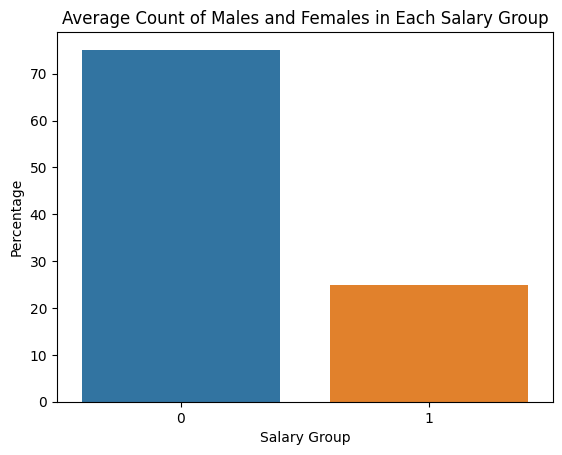

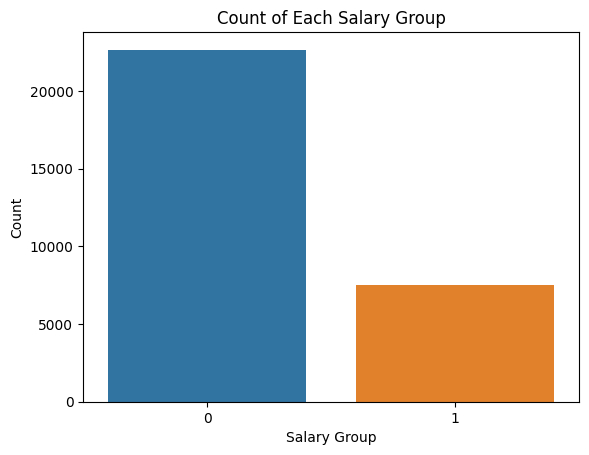

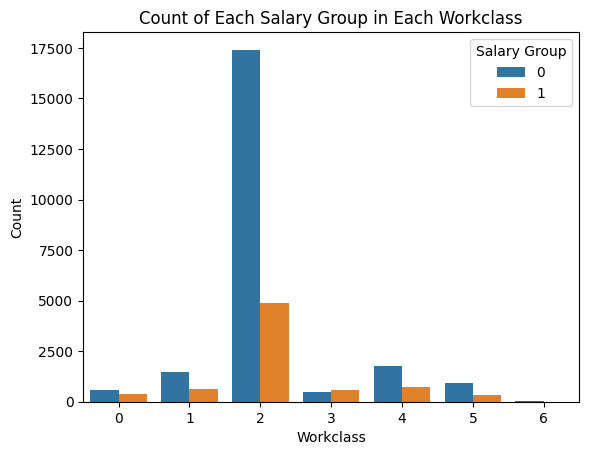

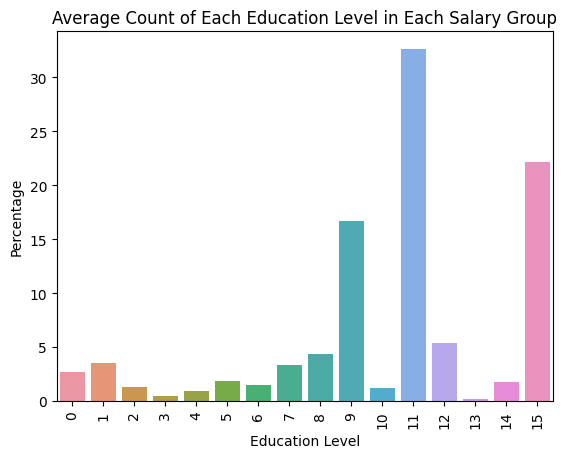

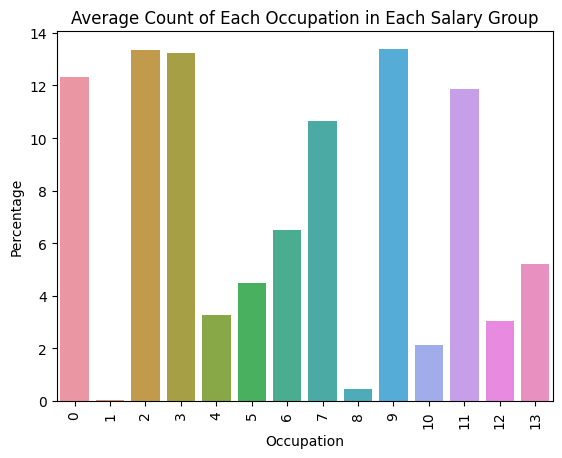

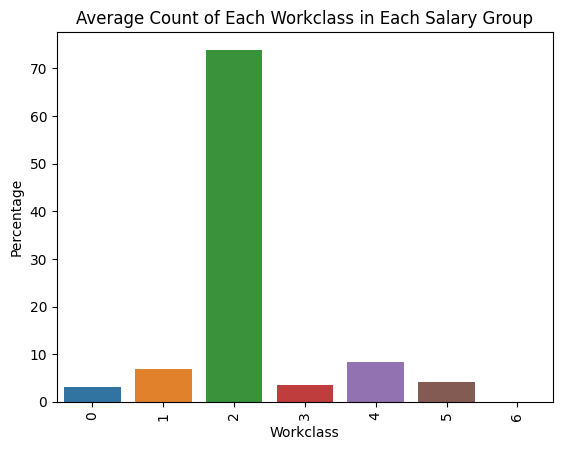

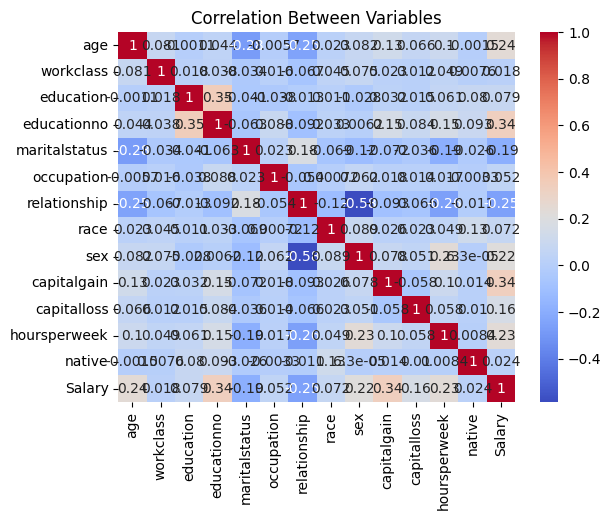

In [ ]:
# TODO: Display pairwise relationships between variables in the train_data dataframe

# TODO: Plot the average count of males and females in each salary group using a bar plot

# TODO: Plot the count of each salary group in the train_data dataframe using a countplot

# TODO: Plot the count of each salary group in each workclass using a bar plot

# TODO: Plot the average count of each education level in each salary group using a bar plot

# TODO: Plot the average count of each occupation in each salary group using a bar plot

# TODO: Plot the average count of each workclass in each salary group using a bar plot

# TODO: Plot the correlation between variables in the train_data dataframe using a heatmap

# Pairwise relationships between variables
label_encoder = LabelEncoder()

for column in train_data.columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])


sns.pairplot(train_data)
plt.show()




# Average count of males and females in each salary group
sns.barplot(x='Salary', y='sex', data=train_data, estimator=lambda x: len(x) / len(train_data) * 100)
plt.xlabel('Salary Group')
plt.ylabel('Percentage')
plt.title('Average Count of Males and Females in Each Salary Group')
plt.show()

# Count of each salary group
sns.countplot(x='Salary', data=train_data)
plt.xlabel('Salary Group')
plt.ylabel('Count')
plt.title('Count of Each Salary Group')
plt.show()

# Count of each salary group in each workclass
sns.countplot(x='workclass', hue='Salary', data=train_data)
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Count of Each Salary Group in Each Workclass')
plt.legend(title='Salary Group')
plt.show()

# Average count of each education level in each salary group
sns.barplot(x='education', y='Salary', data=train_data, estimator=lambda x: len(x) / len(train_data) * 100)
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.title('Average Count of Each Education Level in Each Salary Group')
plt.xticks(rotation=90)
plt.show()

# Average count of each occupation in each salary group
sns.barplot(x='occupation', y='Salary', data=train_data, estimator=lambda x: len(x) / len(train_data) * 100)
plt.xlabel('Occupation')
plt.ylabel('Percentage')
plt.title('Average Count of Each Occupation in Each Salary Group')
plt.xticks(rotation=90)
plt.show()

# Average count of each workclass in each salary group
sns.barplot(x='workclass', y='Salary', data=train_data, estimator=lambda x: len(x) / len(train_data) * 100)
plt.xlabel('Workclass')
plt.ylabel('Percentage')
plt.title('Average Count of Each Workclass in Each Salary Group')
plt.xticks(rotation=90)
plt.show()

# Correlation between variables
correlation = train_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()


###  Outliers Detection

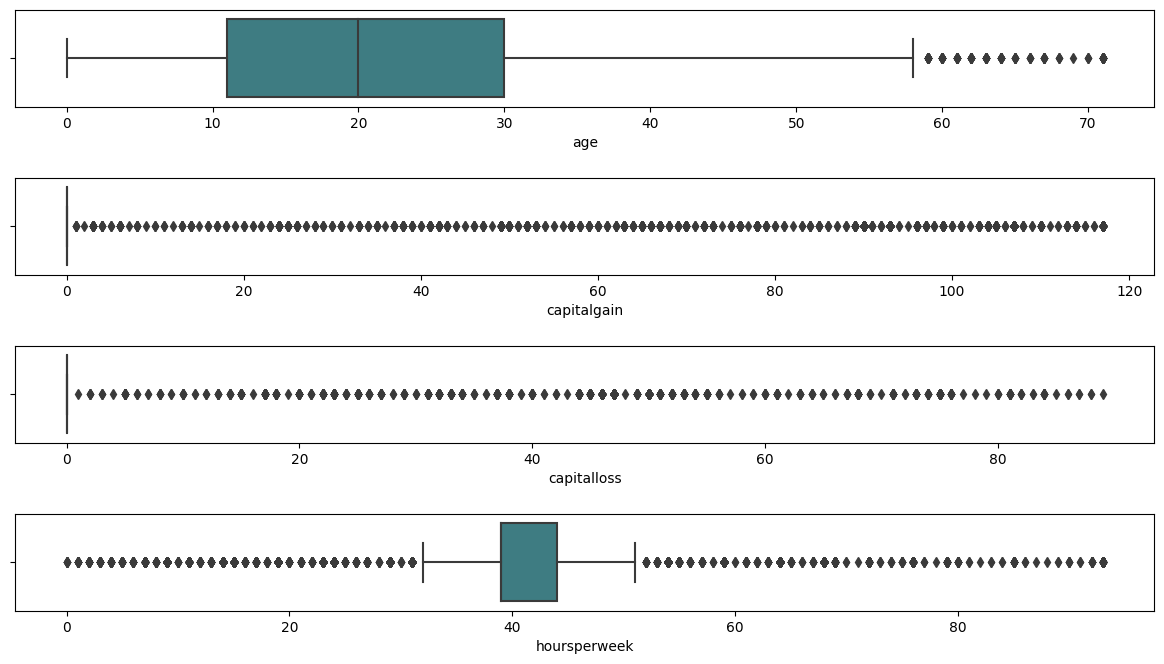

In [ ]:
outlier1 = train_data.copy()
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier1,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier1,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier1,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier1,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

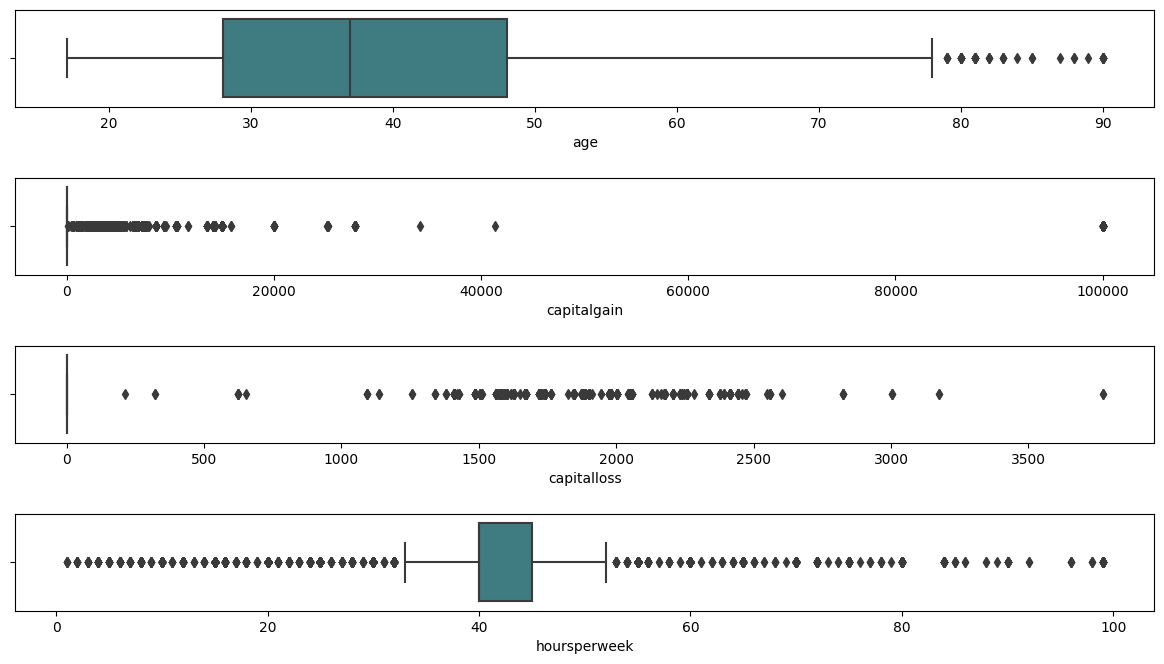

In [ ]:
outlier2 = test_data.copy()
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier2,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier2,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier2,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier2,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

#### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

## Section 4. Data Preprocessing

In [ ]:
# TODO: Create a LabelEncoder object

# TODO: Use the LabelEncoder object to transform these columns of the train_data dataframe:

# workclass, education, maritalstatus, occupation, relationship, race, sex, native

# TODO: Display the modified train_data dataframe

# TODO: Use a list comprehension to replace the values in the 'Salary' column of
# the train_data dataframe with 0 if the value is<=50K' and 1 if the value is '>50K'

# TODO: Do the same preprocessing to test data



# Display the modified train_data dataframe
print(train_data)

for column in test_data.columns:
    test_data[column] = label_encoder.fit_transform(test_data[column])

       age  workclass  education  educationno  maritalstatus  occupation  \
0       22          5          9           12              4           0   
1       33          4          9           12              2           3   
2       21          2         11            8              0           5   
3       36          2          1            6              2           5   
4       11          2          9           12              2           9   
...    ...        ...        ...          ...            ...         ...   
30156   10          2          7           11              2          12   
30157   23          2         11            8              2           6   
30158   41          2         11            8              6           0   
30159    5          2         11            8              4           0   
30160   35          3         11            8              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0            

## Section 5. Model Building

In [ ]:
# TODO: Create X_train by dropping the 'Salary' column from the train_data dataframe

# TODO: Create y_train by selecting only the 'Salary' column from the train_data dataframe

# TODO: Create X_test by dropping the 'Salary' column from the test_data dataframe

# TODO: Create y_test by selecting only the 'Salary' column from the test_data dataframe

# TODO: Print the shape of X_train, y_train, X_test, and y_test dataframes

# TODO: Create a Support Vector Classifier object

# Create X_train by dropping the 'Salary' column from the train_data dataframe
X_train = train_data.drop('Salary', axis=1)

# Create y_train by selecting only the 'Salary' column from the train_data dataframe
y_train = train_data['Salary']

# Create X_test by dropping the 'Salary' column from the test_data dataframe
X_test = test_data.drop('Salary', axis=1)

# Create y_test by selecting only the 'Salary' column from the test_data dataframe
y_test = test_data['Salary']

# Print the shape of X_train, y_train, X_test, and y_test dataframes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Create a Support Vector Classifier object
svc = SVC()

X_train shape: (30161, 13)
y_train shape: (30161,)
X_test shape: (15060, 13)
y_test shape: (15060,)


## Section 6. Model Training | Testing | Evaluation - SVM Model

In [ ]:
# TODO: Train the svc model with X_train and y_train

# TODO: Use the svc model to predict the values of y for X_test and store the result in y_pred

# TODO: Print the confusion matrix of y_test and y_pred

# TODO: Print the classification report of y_test and y_pred

# TODO: Print the training accuracy of the svc model with X_train and y_train

# TODO: Print the testing accuracy of the svc model with X_test and y_test

# Train the svc model

svc.fit(X_train, y_train)

# Use the svc model to predict the values of y for X_test
y_pred = svc.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the training accuracy
train_accuracy = svc.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Print the testing accuracy
test_accuracy = svc.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

[[11198   162]
 [ 2672  1028]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     11360
           1       0.86      0.28      0.42      3700

    accuracy                           0.81     15060
   macro avg       0.84      0.63      0.65     15060
weighted avg       0.82      0.81      0.77     15060

Training Accuracy: 0.8138987434103644
Testing Accuracy: 0.8118193891102258


##Section 7. Handling Imbalance Data

In [ ]:
# TODO: Print the count of each unique value in the 'Salary' column of the train_data dataframe

# TODO: Create a SMOTE object

# TODO: Use  the SMOTE object to resample the X_train and y_train dataframes
# and store the result in X_resampled and y_resampled, respectively

# TODO: Display the resampled X_resampled dataframe

# TODO: Display the resampled y_resampled dataframe

# TODO: Print the count of each unique value in the resampled y_resampled dataframe

# Count of each unique value in the 'Salary' column of train_data dataframe
salary_counts = train_data['Salary'].value_counts()
print(salary_counts)

# Creating a SMOTE object
smote = SMOTE()

# Resampling the X_train and y_train dataframes using SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Displaying the resampled X_resampled dataframe
print(X_resampled)

# Displaying the resampled y_resampled dataframe
print(y_resampled)

# Count of each unique value in the resampled y_resampled dataframe
resampled_salary_counts = pd.Series(y_resampled).value_counts()
print(resampled_salary_counts)


0    22653
1     7508
Name: Salary, dtype: int64
       age  workclass  education  educationno  maritalstatus  occupation  \
0       22          5          9           12              4           0   
1       33          4          9           12              2           3   
2       21          2         11            8              0           5   
3       36          2          1            6              2           5   
4       11          2          9           12              2           9   
...    ...        ...        ...          ...            ...         ...   
45301   49          3          9           11              2           3   
45302   38          2          9           11              2           0   
45303   23          2          7           11              2           9   
45304   22          2          9           12              2           7   
45305   21          0         15            9              2           3   

       relationship  race  sex  capita

* 0.0001 < gamma < 10
* 0.1 < C < 100 -- gamma--decision boundary shape (Larger gamma value-overfitting of the model)
* C parameter adds a penalty for each misclassified data point

In [ ]:
# TODO: Create a Support Vector Classifier object,
# try to change it's parameters for better accuracy
svm = SVC(gamma=0.0001, C=100)
# TODO: Train the model with resampled X and y dataframes as arguments
svm.fit(X_resampled, y_resampled)
# TODO: Use the model to predict the values of y for X_test and store the result in y_pred
y_pred = svm.predict(X_test)
# TODO: Print the confusion matrix of y_test and y_pred
print(confusion_matrix(y_test, y_pred))
# TODO: Print the classification report of y_test and y_pred
print(classification_report(y_test, y_pred))
# TODO: Print the training accuracy of the model with resampled X and y dataframes as arguments
train_accuracy = svm.score(X_resampled, y_resampled)
print("Training Accuracy:", train_accuracy)
# TODO: Print the testing accuracy of the model with X_test and y_test as arguments
test_accuracy = svm.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

[[8671 2689]
 [ 718 2982]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.84     11360
           1       0.53      0.81      0.64      3700

    accuracy                           0.77     15060
   macro avg       0.72      0.78      0.74     15060
weighted avg       0.83      0.77      0.79     15060

Training Accuracy: 0.8016598243058315
Testing Accuracy: 0.7737715803452855


## Section 8. Feature Selection

In [ ]:
def select_features(X_train, y_train, X_test):

    # TODO: Create a SelectKBest object with chi2 as the score function

    # TODO: Fit the X_train and y_train dataframes using the SelectKBest object

    # TODO: Transform the X_train dataframe using the SelectKBest object and store the result in X_train_fs

    # TODO: Transform the X_test dataframe using the SelectKBest object and store the result in X_test_fs

    # TODO: Return the X_train_fs, X_test_fs, and SelectKBest object

    # Create a SelectKBest object with chi2 as the score function
    fs = SelectKBest(score_func=chi2)

    # Fit the X_train and y_train dataframes using the SelectKBest object
    fs.fit(X_train, y_train)

    # Transform the X_train dataframe using the SelectKBest object and store the result in X_train_fs
    X_train_fs = fs.transform(X_train)

    # Transform the X_test dataframe using the SelectKBest object and store the result in X_test_fs
    X_test_fs = fs.transform(X_test)

    # Return the X_train_fs, X_test_fs, and SelectKBest object
    return X_train_fs, X_test_fs, fs


Feature 1: 14217.682182497514
Feature 2: 4.0612612561312185
Feature 3: 264.81580715520585
Feature 4: 2417.133584324709
Feature 5: 982.2276592748894
Feature 6: 218.59737750505636
Feature 7: 3435.382730752923
Feature 8: 29.339535424884826
Feature 9: 459.2192975768097
Feature 10: 283941.161960417
Feature 11: 38538.09187932854
Feature 12: 5658.14975002962
Feature 13: 16.707319972640118


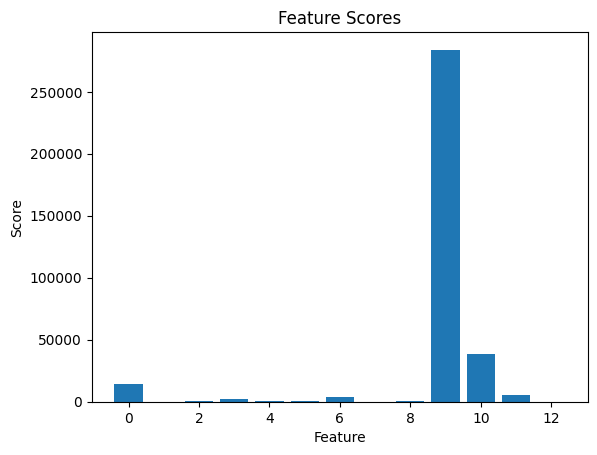

Top Features: ['capitalgain', 'capitalloss', 'age', 'hoursperweek', 'relationship']


In [ ]:
# TODO: Call the select_features() function and store the result in X_fs, X_test_fs, and fs

# TODO: print the corresponding score of each feature using scores_ attribute of the fs object

# TODO: Create a bar plot of the scores

# TODO: Display the bar plot

# TODO Pick out the most relevant features

# Call the select_features() function and store the result in X_fs, X_test_fs, and fs
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Print the corresponding score of each feature using scores_ attribute of the fs object
for i in range(len(fs.scores_)):
    print(f"Feature {i+1}: {fs.scores_[i]}")

# Create a bar plot of the scores
plt.bar(range(len(fs.scores_)), fs.scores_)
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Feature Scores')
plt.show()

# Pick out the most relevant features (e.g., top 5 features with highest scores)
top_features_indices = sorted(range(len(fs.scores_)), key=lambda i: fs.scores_[i], reverse=True)[:5]
top_features = [X_train.columns[i] for i in top_features_indices]
print("Top Features:", top_features)

In [ ]:
# TODO: Create a copy of the train_data dataframe called train_data_copy

# TODO: Drop the columns with irrelevant features from the train_data_copy dataframe

# TODO: Display the train_data_copy dataframe

# TODO: Do the same to the test_data

# Create a copy of the train_data dataframe called train_data_copy
train_data_copy = train_data.copy()

# Drop the columns with irrelevant features from the train_data_copy dataframe
train_data_copy = train_data_copy.drop(columns=[X_train.columns[i] for i in range(len(fs.scores_)) if i not in top_features_indices])

# Display the train_data_copy dataframe
print(train_data_copy)

# Do the same to the test_data
test_data_copy = test_data.copy()
test_data_copy = test_data_copy.drop(columns=[X_test.columns[i] for i in range(len(fs.scores_)) if i not in top_features_indices])
print(test_data_copy)

       age  relationship  capitalgain  capitalloss  hoursperweek  Salary
0       22             1           24            0            39       0
1       33             0            0            0            12       0
2       21             1            0            0            39       0
3       36             0            0            0            39       0
4       11             5            0            0            39       0
...    ...           ...          ...          ...           ...     ...
30156   10             5            0            0            37       0
30157   23             0            0            0            39       1
30158   41             4            0            0            39       0
30159    5             3            0            0            19       0
30160   35             5          107            0            39       1

[30161 rows x 6 columns]
       age  relationship  capitalgain  capitalloss  hoursperweek  Salary
0        8             3 

## Section 9. Model Training with Highly Relevant Features


In [ ]:
# TODO: Repeat all the steps in Section 6 with the new dataset that has irrelevant features removed
# Create X_train by dropping the 'Salary' column from the train_data dataframe
X_train_copy = train_data_copy.drop('Salary', axis=1)

# Create y_train by selecting only the 'Salary' column from the train_data dataframe
y_train_copy = train_data_copy['Salary']

# Create X_test by dropping the 'Salary' column from the test_data dataframe
X_test_copy = test_data_copy.drop('Salary', axis=1)

# Create y_test by selecting only the 'Salary' column from the test_data dataframe
y_test_copy = test_data_copy['Salary']

# Print the shape of X_train, y_train, X_test, and y_test dataframes
print("X_train_copy shape:", X_train_copy.shape)
print("y_train_copy shape:", y_train_copy.shape)
print("X_test_copy shape:", X_test_copy.shape)
print("y_test_copy shape:", y_test_copy.shape)

# Create a Support Vector Classifier object
svc = SVC()
# Train the svc model

svc.fit(X_train_copy, y_train_copy)

# Use the svc model to predict the values of y for X_test
y_pred_copy = svc.predict(X_test_copy)

# Print the confusion matrix
print(confusion_matrix(y_test_copy, y_pred_copy))

# Print the classification report
print(classification_report(y_test_copy, y_pred_copy))

# Print the training accuracy
train_accuracy = svc.score(X_train_copy, y_train_copy)
print("Training Accuracy:", train_accuracy)

# Print the testing accuracy
test_accuracy = svc.score(X_test_copy, y_test_copy)
print("Testing Accuracy:", test_accuracy)

X_train_copy shape: (30161, 5)
y_train_copy shape: (30161,)
X_test_copy shape: (15060, 5)
y_test_copy shape: (15060,)
[[11224   136]
 [ 2782   918]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.88     11360
           1       0.87      0.25      0.39      3700

    accuracy                           0.81     15060
   macro avg       0.84      0.62      0.64     15060
weighted avg       0.82      0.81      0.76     15060

Training Accuracy: 0.8073008189383641
Testing Accuracy: 0.8062416998671978
